In [93]:
%matplotlib inline

from ast import literal_eval
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.8f}'.format
sns.set(font="Meiryo")

# საწყისი ცხრილი

ცხრილის მონაცემები, სადაც კორპუსიდან ამოღბულია სიტყვის ყველა შესაძლო მახასიათებელი. მათ შორის ლემების და მეტყველების ნაწილაკებიხ რამოდენიმე ვარიანტი

In [2]:
df = pd.read_csv('csv/adv_dict.csv')
df[:100]

,word_init,word_mod,lemma_basic,lemma_adv,pos_tag,freq
0,ამ,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}","{'Pron', 'Dem', 'Gen', 'Erg', 'Prop', 'Inst', ...",1041654
1,ზამთრის,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}","{'ზამთ[ა]რ-ი', 'ზამთ[ა]რ·ი'}","{'Gen', 'Sg', 'LevGuess', 'Temp', 'N'}",8035
2,მიწურულს,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...","{'Pv', 'Sg', 'A', 'PastPart', 'LevGuess', 'Dat...",5976
3,თითქმის,თითქმის,{'თითქმის'},{'თითქმის'},"{'LevGuess', 'Adv', 'DegNum', 'Deg'}",62608
4,სასოწარკვეთილი,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}","{'სასოწარკვეთილ·ი', 'სასოწარკვეთილ-ი'}","{'Gen', 'Att', 'A', 'Nom', 'Sg', 'Inst', 'LevG...",844
...,...,...,...,...,...,...
95,ხომ,ხომ,{'ხომ'},{'ხომ'},"{'Disc', 'Adv'}",127578
96,ვსაყვედურობდი,ვსაყვედურობდი,"{'საყვედურ·ი', 'საყვედური'}","{'საყვედურ-ი/საყვედურ', 'საყვედურ·ი/საყვედურ'}","{'<S:Nom>', 'S:1Sg', 'V', 'MedAct', '<S-IO>', ...",19
97,საწინააღმდეგო,საწინააღმდეგო,{'საწინააღმდეგო'},{'საწინააღმდეგო'},"{'Gen', 'Erg', 'Att', 'A', 'Nom', 'Inst', 'Sg'...",9474
98,გაქვს,გაქვს,{'ქონა'},{'ქონ[ა]/ქვ'},"{'DO:3', '<DO:Nom>', 'V', 'Inv', '<S:Dat>', 'S...",8972


In [3]:
print(f'number of words: {df.shape[0]}')

number of words: 2635260


## ცხრილის გასუფთავება

### სიტყვები

In [4]:
df['diff'] = np.where(df['word_init'] != df['word_mod'], 1, 0)
diff = df[df['diff'] == 1]
print(f'number of words with different "word_init" and "word_mod" forms: {diff.shape[0]}')
diff[:100]

number of words with different "word_init" and "word_mod" forms: 39066


,word_init,word_mod,lemma_basic,lemma_adv,pos_tag,freq,diff
163,ფანტავდა~,ფანტავდა,{'*·ფანტვა'},{'*·ფანტვ[ა]/ფანტ'},"{'<S:Nom>', 'DO:3', 'S:3Sg', 'V', '<DO:Dat>', ...",50,1
177,სტაბეკს,სტაშეკს,{'სტაშეკ'},{'სტაშეკ'},"{'Prop', 'Anthr', 'Dialect', 'LevGuess', 'Firs...",8,1
219,დამკვიდრა,დამკვიდრდა,"{'დამკვიდრება', 'და·მკვიდრება'}","{'და·მკვიდრებ[ა]/მკვიდრ', 'და-მკვიდრებ[ა]/მკვი...","{'Pv', '<S:Nom>', 'S:3Sg', 'V', '<S>', 'LevGue...",2083,1
333,დავბოდიალობდი,დავბორიალობდი,{'და·ბორიალ·ი'},{'და·ბორიალ·ი/ბორიალ'},"{'Pv', '<S:Nom>', 'S:1Sg', 'V', 'MedAct', '<S>...",22,1
428,მქონებოდა,მგონებოდა,{'გონება'},{'გონებ[ა]/გონ'},"{'DO:3', '<DO:Nom>', 'V', 'Inv', '<S:Dat>', '<...",19,1
...,...,...,...,...,...,...,...
6535,გავვოცდი,გავოცდი,{'გა·ოცება'},{'გა·ოცებ[ა]/ოც'},"{'Pv', '<S:Nom>', 'S:1Sg', 'V', '<S>', 'LevGue...",288,1
6541,ახვრებს,ახარებს,"{'ხარება', '*·ხარება', 'გა·ხარება'}","{'გა·ხარებ[ა]/ხარ', '*·ხარება', '*·ხარებ[ა]/ხარ'}","{'<S:Nom>', 'DO:3', 'S:3Sg', 'V', '<S-DO-IO>',...",591,1
6742,მხირულება,მხიარულება,{'მხიარულება'},{'მხიარულებ[ა]'},"{'Sg', 'Nom', 'Voc', 'LevGuess', 'N'}",448,1
6854,ფონოკაბინეტს,ფოტოკაბინეტს,{'ფოტოკაბინეტ·ი'},{'ფოტოკაბინეტ·ი'},"{'LevGuess', 'Dat', 'Sg', 'N'}",2,1


ზოგ შემთხვევაში "word_mod"-ში მოცემული გვაქვს "word_init" ფორმის ანუ რაც ტექსტში იყო მოცემული საწყისად მისი გასწორებული ვარიანტი. დამკვიდრა -> დამკვიდრდა ან გავვოცდი -> გავოცდი, მხირულება -> მხიარულება. თუმცა ზოგიერთ შემთხვევაში ძირფესვიანი ცვლილება ხდება სიტყვის მქონებოდა -> მგონებოდა ან ახვრებს -> ახარებს ;დდდ. ყველა შემთხვევაში ლემები გვაქვს სიტყვის სახეცვლილი/ გასწორებული ფორმის და არა იმ ფორმის რაც რეალურად ტექტში იყო ანუ გამართული ქართული სიტყვს. აქედან გამომდინარე შეგვიძლია საწყისი ველი დავდროფოთ საერთოდ. 

In [5]:
df = df.drop(['word_init', 'diff'], axis=1)
df = df.rename(columns={'word_mod': 'word'})
df = df.dropna(subset=['word'])
df[:100]

,word,lemma_basic,lemma_adv,pos_tag,freq
0,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}","{'Pron', 'Dem', 'Gen', 'Erg', 'Prop', 'Inst', ...",1041654
1,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}","{'ზამთ[ა]რ-ი', 'ზამთ[ა]რ·ი'}","{'Gen', 'Sg', 'LevGuess', 'Temp', 'N'}",8035
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...","{'Pv', 'Sg', 'A', 'PastPart', 'LevGuess', 'Dat...",5976
3,თითქმის,{'თითქმის'},{'თითქმის'},"{'LevGuess', 'Adv', 'DegNum', 'Deg'}",62608
4,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}","{'სასოწარკვეთილ·ი', 'სასოწარკვეთილ-ი'}","{'Gen', 'Att', 'A', 'Nom', 'Sg', 'Inst', 'LevG...",844
...,...,...,...,...,...
95,ხომ,{'ხომ'},{'ხომ'},"{'Disc', 'Adv'}",127578
96,ვსაყვედურობდი,"{'საყვედურ·ი', 'საყვედური'}","{'საყვედურ-ი/საყვედურ', 'საყვედურ·ი/საყვედურ'}","{'<S:Nom>', 'S:1Sg', 'V', 'MedAct', '<S-IO>', ...",19
97,საწინააღმდეგო,{'საწინააღმდეგო'},{'საწინააღმდეგო'},"{'Gen', 'Erg', 'Att', 'A', 'Nom', 'Inst', 'Sg'...",9474
98,გაქვს,{'ქონა'},{'ქონ[ა]/ქვ'},"{'DO:3', '<DO:Nom>', 'V', 'Inv', '<S:Dat>', 'S...",8972


ამ ყველაფერთან ერთად გვაქვს სიტყვები, რომლებიც, არასწორადაა ამოჭრილი. მაგ: (სიტყვა, ლათინ- და ა.შ. ანუ შეიცავს ასეობის და რიცხვების გარდა სხვა აღმნიშვნელ ნაწილებს და მისი სხვა ფორმა უკვე მოიძებნება კორპუსში. ესეიგი ეს არ შეეხება კომპოზიტებს, რომლებიც ცალსახად დეფისით იწერება.

In [6]:
words = set(df['word'])
malformed_words = set()
malformed_word_indecies = list()
def extract(row):
    x = row['word']
    noise = re.compile(r'\W', re.UNICODE)
    try:
        word = noise.sub(r'', x)
        if word.isnumeric():
            return
        composite = x.split('-')  # check if word is a composite
        if len(composite) == 2 and ((composite[0] in words and composite[1] in words) or (composite[1].startswith(composite[0]))):
            return
        if all(map(lambda x: len(x) == 1, x.split('.'))):  # check for abbreviation and initials
            return
        if word != x and word in words:
            malformed_words.add((x, word))
            malformed_word_indecies.append(row.name)
    except Exception:
        print(x)
    
            
df.apply(extract, axis=1)
print(f"Number of malformed words: {len(malformed_words)}")


Number of malformed words: 75023


In [7]:
for i, word in enumerate(malformed_words):
    if i == 50:
        break
    print(word)

('ტელეარხებიდან.”', 'ტელეარხებიდან')
('ჯი-ეი-ჩენთან', 'ჯიეიჩენთან')
('გამოგიყოფთ-', 'გამოგიყოფთ')
('ადიბას“', 'ადიბას')
('Press“', 'Press')
('დაფუძ-ნდა', 'დაფუძნდა')
('ოკრო-ბოკროა', 'ოკრობოკროა')
('ვითომ“', 'ვითომ')
('თეიმურაზ:-', 'თეიმურაზ')
('საქმე-', 'საქმე')
('ხელ-მძღვანელი', 'ხელმძღვანელი')
('ნადირ(აძე)ობა', 'ნადირაძეობა')
('-მე-11', 'მე11')
('დაიწყეს.„', 'დაიწყეს')
('მაგალითიდან.“', 'მაგალითიდან')
('ლირი-', 'ლირი')
('მომიხდა.”', 'მომიხდა')
('შესვლაზე.„', 'შესვლაზე')
('იტყვის…-', 'იტყვის')
('ხმობასა-', 'ხმობასა')
('!შრომა', 'შრომა')
('ასტრახანელი.”', 'ასტრახანელი')
('მაისურაძე:„', 'მაისურაძე')
('ყველამ.“', 'ყველამ')
('გრუნტზე.“', 'გრუნტზე')
('არავის-', 'არავის')
('ფუთფუთი-', 'ფუთფუთი')
('კუ--', 'კუ')
('გენაც-ვალე', 'გენაცვალე')
('ადამიანში-', 'ადამიანში')
('ილუს-ტრაციებით', 'ილუსტრაციებით')
('ლაშქარ-', 'ლაშქარ')
('გკს“', 'გკს')
('იამშჩიკი”', 'იამშჩიკი')
('wonca”', 'wonca')
('ვაზი+', 'ვაზი')
('შესახებ…თამარ', 'შესახებთამარ')
('ქატოს”', 'ქატოს')
('ჩა-ვარდ-ნილი', 'ჩავარდნილი')
('“.მშ

შეგვიძლია ასეთი დეფორმირებული სიტყვები ამოვიღოთ სიიდან.

In [8]:
df = df.drop(malformed_word_indecies).reset_index(drop=True)
df.shape

(2560235, 5)

ასევე ბლომად გვაქვს მოცემული არაქართული სიტყვები და სიტყვები სადაც ქართული ანბანიდან ამოღებული ასოებია გამოყენებული ან სიტყვები, რომლებიც უბრალოდ 

In [9]:
words = set(df['word'])
malformed_words = set()
malformed_word_indecies = list()
def extract(row):
    word = row['word']
    noise = re.compile(r'[^ა-ჰ0-9-]+', re.UNICODE)
    number_or_time = re.compile(r'([0-9]+[.,:-]?)+', )
    try:
        if noise.search(word) is not None and number_or_time.match(word) is None:
            malformed_words.add(word)
            malformed_word_indecies.append(row.name)
    except Exception:
        print(word)
            
df.apply(extract, axis=1)
print(f"Number of malformed words: {len(malformed_words)}")

Number of malformed words: 175383


In [10]:
for i, word in enumerate(malformed_words):
    if i == 50:
        break
    print(word)

ს.პაპაშვილი
ფრეი-3.5
guam
Kämpfen
chi
nether
Here
…სახვთისნიერო
გააგრძელა.სახელმწიფო
იგი.მისივე
ჲთხრა
”���������
INDIEN
მოიკითხოს…ისიც
ლამაკი-5(ძერბინი
коровка
every
ITV-ის
»-სი
Скуратова
ეფექტებით.6
(ნორვეგია)279,7
pasar
турками
PA
”მედი-კლაბის„
პირიქით.ახლაც
კურსი(DOTS)
მონაწილეობა.არანაკლებ
drive
VII-ს
mistikaa
თვეში)..ნინო
გამოარჩევს:გიორგი
-43.5
gospel
დავალებული.ამ
отчеты
терпит
პროექტი.ეს
+21
პოლიტ.ტუტუცი“
Постум
შექმნეს.როგორც
(3600(3600)
Active
დაასახელა.აშშ-ის
ო.ნათიშვილი
hérétique
primitivamente


In [11]:
df = df.drop(malformed_word_indecies).reset_index(drop=True)
df.shape

(2384852, 5)

### მეტყველების ნაწილის თეგები

ვინაიდან ცხრილში pos_tag-ზე გვაქვს ყველა შესაძლო კონტექსტში გამოყენებულ სიტყვაზე ინფორმაცია, თუ რომელ მეტყველების ნაწილს მიეკუთვნება. უკონტექსტოდ ეს ინფორმაცია არ იქნება გამოსადეგი ჩვენთვის. პირველადი ვარაუდი მქონდა, რომ არ შეიძლებოდა უმეტესობა სიტყვა მოაზრებული ყოფილიყო რამდენიმე მეტყველების ნაწილად სხვადასხვა კონტექსტში, ფორმების განსხვავებულობის გამო. თუმცა, როგორც მაგალითებიდან ვხედავთ ასე არ ხდება ამ კორპუსში:

In [12]:
df[df['word'] == 'მივდივარ']['pos_tag']

6820    {'Pv', '<S:Nom>', 'S:3Pl', '<DO:Nom>', 'S:3Sg'...
Name: pos_tag, dtype: object

In [13]:
df[df['word'] == 'სასოწარკვეთილი']['pos_tag']

4    {'Gen', 'Att', 'A', 'Nom', 'Sg', 'Inst', 'LevG...
Name: pos_tag, dtype: object

ერთ შემთხვევაში ცალსახად ზმნა ასევე, არსებით სახელადაცაა მონიშნული, მეორე შემთხვევაში აშკარა ზედსართავი სახელი არსებით სახელად, აქედან გამომდინარე უმჯობესი იქნება თუ უკონტექსტოდ არ გვექნება pos_tag-ი გამოყენებული.

In [14]:
df = df.drop(['pos_tag'], axis=1)
df[:100]

,word,lemma_basic,lemma_adv,freq
0,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}",1041654
1,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}","{'ზამთ[ა]რ-ი', 'ზამთ[ა]რ·ი'}",8035
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...",5976
3,თითქმის,{'თითქმის'},{'თითქმის'},62608
4,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}","{'სასოწარკვეთილ·ი', 'სასოწარკვეთილ-ი'}",844
...,...,...,...,...
95,გადავეხვიე,{'გადა·ხვევა'},{'გადა·ხვევ[ა]/ხვ'},35
96,შუბლზე,"{'შუბლი', 'შუბლ·ი'}","{'შუბლ·ი', 'შუბლ-ი'}",1697
97,ვაკოცე,{'კოცნა'},{'კოცნ[ა]/კოც'},174
98,როგორც,"{'როგორც', 'როგორც კი'}","{'როგორც', 'კი'}",478016


### ლემები

#### ულემო სიტყვები

In [15]:
no_lemma = df[(df['lemma_basic'] == "{'??'}") & (df['lemma_adv'] == "{'??'}")]
print(f'Number of words without lemmas: {no_lemma.shape[0]}')
print(f'Frequency of words without lemmas: {no_lemma["freq"].sum()}, prct: {no_lemma["freq"].sum() / df["freq"].sum() * 100}%')
print(f'The most frequent words without lemma:')
no_lemma.sort_values(by=['freq'], ascending=False)[: 100]

Number of words without lemmas: 910909
Frequency of words without lemmas: 3745518, prct: 2.3720464719763865%
The most frequent words without lemma:


,word,lemma_basic,lemma_adv,freq
767714,ვიტ,{'??'},{'??'},8375
877574,ინტერ-პრესი,{'??'},{'??'},6784
901566,პრაიმ-ნიუსი,{'??'},{'??'},5833
526919,ჩელსის,{'??'},{'??'},5563
395527,ქართულ-აფხაზური,{'??'},{'??'},5375
...,...,...,...,...
102988,მიგელ,{'??'},{'??'},1187
66934,კოული,{'??'},{'??'},1183
985215,მედია-ნიუსს,{'??'},{'??'},1177
411266,რონალდ,{'??'},{'??'},1172


როგორც ვხედავთ, იმის მიუხედავად, რომ კორპუსში არსებული სიტყვების ნახევარს საერთოდ არ აქვს ლემმა. ისინი გამოყენების სიხშირით კორპუსის მხოლოდ 2%-ს შეადგენენ. ამასთან ერთად როგორც ვხედავთ pos-tag-იც კი არასწორად აქვთ შესაბამებული. მაგ: ანტირუსული სახელად არის წარმოდგენილი და ა.შ. ტრენინგისთვის სრულიად გამოუსადეგარი იქნება ამიტომაც ასეთ სიტყვებსაც ვდროფავ.

In [16]:
df = df.drop(no_lemma.index).reset_index(drop=True)
print(f'Number of words left: {df.shape[0]}')
df[:100]

Number of words left: 1473943


,word,lemma_basic,lemma_adv,freq
0,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}",1041654
1,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}","{'ზამთ[ა]რ-ი', 'ზამთ[ა]რ·ი'}",8035
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...",5976
3,თითქმის,{'თითქმის'},{'თითქმის'},62608
4,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}","{'სასოწარკვეთილ·ი', 'სასოწარკვეთილ-ი'}",844
...,...,...,...,...
95,შუბლზე,"{'შუბლი', 'შუბლ·ი'}","{'შუბლ·ი', 'შუბლ-ი'}",1697
96,ვაკოცე,{'კოცნა'},{'კოცნ[ა]/კოც'},174
97,როგორც,"{'როგორც', 'როგორც კი'}","{'როგორც', 'კი'}",478016
98,ჩანს,"{'ჩანი', 'ჩან·ი', '*·ჩენა', '*ჩენა'}","{'ჩან·ი', 'ჩან-ი', '*-ჩენ[ა]/ჩან', '*·ჩენ[ა]/ჩ...",57172


#### განსხვავებული ტიპის ლემები

In [17]:
print(df[df['word'] == 'ჭამა'][['word', 'lemma_adv', 'lemma_basic']])
print(df[df['word'] == 'ჭამს'][['word', 'lemma_adv', 'lemma_basic']])

       word               lemma_adv     lemma_basic
18217  ჭამა  {'ჭამ[ა]/ჭამ', 'ჭ[ა]'}  {'ჭამა', 'ჭა'}
       word       lemma_adv lemma_basic
11963  ჭამს  {'ჭამ[ა]/ჭამ'}    {'ჭამა'}


ძალიან უცნაური ლემები აქვთ ზოგიერთ შემთხვევაში ამა თუ იმ სიტყვას. არ ვიცი რა კონტექსტში შეიძლება იყოს ჭამა ჭის რაიმე ფორმა. (ერთადერთი რაც მახსენდება შესაძლებელია ჭამ (ჭის მოთხრობითი ბრუნვა და ჭამის მეორე პირის მხოლობითი ფორმა ორივე ნაირად იქნას ინტერპრეტრებული.)) ამასთან ერთად lemma_basic-ში არის სიტყვის არსებითი სახელის ფორმა არჩეული ლემად. სახელზმნის შემთხვევაში. ხოლო lemma_adv-ში "არსებითი სახელი\ზმნის ბუძე" ფორმატი, მიუხედავად იმისა სიტყვა, რომელიც დაგვყავს ზმნადაა მოცემული და არსებით სახელად. და დამატებით აღნიშნულია, მოცილებადი ნაწილი სიტყვის. შესაბამისად მხოლოდ ინფორმატიულ დატვირთვას ატარებს და მარტივი ლემის სხვანაირად წარმოდგენას განასახიერებს.

In [18]:
def tryconvert(x):
    try:
        return len(literal_eval(x))
    except Exception:
        return 0
    
df['diff'] = np.where(df['lemma_basic'].apply(lambda x: len(literal_eval(x))) 
                      != df['lemma_adv'].apply(lambda x: tryconvert(x)) , 1, 0)
diff = df[df['diff'] == 1]
print(diff.shape[0])
diff[:100]

31021


,word,lemma_basic,lemma_adv,freq,diff
0,ამ,"{'??', '\t', 'ეს'}","{'??', 'ეს'}",1041654,1
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}","{'მიწურულ·ი', 'მი-წურულ-ი/წურ', 'მიწურულ-ი', '...",5976,1
5,გახლდით,{'ხლება'},"{'ხლებ[ა]/ახლ', 'ხლებ[ა]/ხლ'}",1689,1
6,რა,"{'რა თქმა უნდა', '\t', 'რა', '??'}","{'უნდა', 'რ[ა]', 'რა', '??', 'თქმა'}",418777,1
7,ხანია,"{'ხანი', 'ხან·ი'}","{'ხ[ა]ნ-ი', 'ხან·ი', 'ხ[ა]ნ·ი'}",24507,1
...,...,...,...,...,...
1213,ვალი,"{'ვალი', 'ვალ·ი'}","{'ვალი', 'ვალ-ი', 'ვალ·ი'}",5625,1
1214,გაწევს,"{'გა·წევა', '*·წოლა'}",{'გა·წევ[ა]/წ[ევ]'},58,1
1223,მილკა,{'მილკა'},"{'მილკა', 'მილკ[ა]'}",20,1
1230,ზმანებათა,{'ზმანება'},"{'ზმანებ[ა]/ზმან', 'ზმანებ[ა]'}",26,1


როგორც ვხედავთ ძირითადად ორივე ლემის ტიპში დამთხვევები გვაქ, ლემების რაოდენობის მხრივ, თუმცა 33205 სიტყვაში საქმე სხვაგვარადაა.

In [19]:
print(df[df['word'] == 'ხანია'][['word', 'lemma_adv', 'lemma_basic']])

    word                        lemma_adv        lemma_basic
7  ხანია  {'ხ[ა]ნ-ი', 'ხან·ი', 'ხ[ა]ნ·ი'}  {'ხანი', 'ხან·ი'}


In [20]:
df = df.drop(['lemma_adv', 'diff'], axis=1)
df = df.rename(columns={'lemma_basic': 'lemma'})
df[:100]

,word,lemma,freq
0,ამ,"{'??', '\t', 'ეს'}",1041654
1,ზამთრის,"{'ზამთარი', 'ზამთარ·ი'}",8035
2,მიწურულს,"{'მი·წურულ·ი', 'მიწურული', 'მიწურულ·ი'}",5976
3,თითქმის,{'თითქმის'},62608
4,სასოწარკვეთილი,"{'სასოწარკვეთილ·ი', 'სასოწარკვეთილი'}",844
...,...,...,...
95,შუბლზე,"{'შუბლი', 'შუბლ·ი'}",1697
96,ვაკოცე,{'კოცნა'},174
97,როგორც,"{'როგორც', 'როგორც კი'}",478016
98,ჩანს,"{'ჩანი', 'ჩან·ი', '*·ჩენა', '*ჩენა'}",57172


#### ლემის ფორმა

In [21]:
print(f"Word: წამოვდექი  Lemma: {df[df['word'] == 'წამოვდექი']['lemma']}")
print(f"Word: ავდექი  Lemma: {df[df['word'] == 'ავდექი']['lemma']}")
print(f"Word: დავდექი  Lemma: {df[df['word'] == 'დავდექი']['lemma']}")
print(f"Word: ვდგავარ  Lemma: {df[df['word'] == 'ვდგავარ']['lemma']}")

Word: წამოვდექი  Lemma: 89    {'წამოდგომა', 'წამო·დგომა'}
Name: lemma, dtype: object
Word: ავდექი  Lemma: 9165    {'ა·დგომა', 'ადგომა'}
Name: lemma, dtype: object
Word: დავდექი  Lemma: 90625    {'და·დგომა'}
Name: lemma, dtype: object
Word: ვდგავარ  Lemma: 2322    {'დგომა'}
Name: lemma, dtype: object


როგორც ვხედავთ საინტერესო სიტყვათა ნათესაობა შეინიშნება ლემებში. საერთო ძირის მქონე სიტყვათა ჯგუფები აღნიშნულია შესაბამისად.

In [22]:
print(f"Word: ზამთარი  Lemma: {df[df['word'] == 'ზამთარი']['lemma']}")
print(f"Word: ზამთრული  Lemma: {df[df['word'] == 'ზამთრული']['lemma']}")
print(f"Word: დაზამთრდა  Lemma: {df[df['word'] == 'დაზამთრდა']['lemma']}")
print(f"Word: საზამთრო  Lemma: {df[df['word'] == 'საზამთრო']['lemma']}")

Word: ზამთარი  Lemma: 47444    {'ზამთარი', 'ზამთარ·ი'}
Name: lemma, dtype: object
Word: ზამთრული  Lemma: 1124123    {'ზამთრულ·ი'}
Name: lemma, dtype: object
Word: დაზამთრდა  Lemma: 313719    {'და·ზამთრება'}
Name: lemma, dtype: object
Word: საზამთრო  Lemma: 43533    {'საზამთრო'}
Name: lemma, dtype: object


In [23]:
print(f"Word: დაკავება  Lemma: {df[df['word'] == 'დაკავება']['lemma']}")
print(f"Word: დაკავებული  Lemma: {df[df['word'] == 'დაკავებული']['lemma']}")

Word: დაკავება  Lemma: 119973    {'დაკავება', 'და·კავება'}
Name: lemma, dtype: object
Word: დაკავებული  Lemma: 62949    {'დაკავებული', 'და·კავებულ·ი'}
Name: lemma, dtype: object


ზემოთა აღნიშნული ფაქტის მიუხედავად, ყველგან არ ჩანს მსგავსი ნათესაობა, ზოგან აშკარად საერთო ძირის მიუხედავად, მცირედი განსხვავებები შეინიშნება გამოყოფილ წერტილებით გამოყოფილ ნაწილებში. ამიტომაც, მიუხედავად იმისა, რომ საინტერესო იდეაა, ვფიქრობ, რომ ჯობია წერტილები დავკარგოთ ლემებიდან და შემდგომ თუ გაჩნდება ამის საჭიროება სხვა გზით მოვნახოთ საერთო ძირები ჩვეულებრივი ლემებიდან.

In [24]:
def remove_dot(x):
    return str({re.sub('·', '', word)for word in literal_eval(x)})

df['lemma'] = df['lemma'].apply(lambda x: remove_dot(x))
df[:100]

,word,lemma,freq
0,ამ,"{'??', '\t', 'ეს'}",1041654
1,ზამთრის,{'ზამთარი'},8035
2,მიწურულს,{'მიწურული'},5976
3,თითქმის,{'თითქმის'},62608
4,სასოწარკვეთილი,{'სასოწარკვეთილი'},844
...,...,...,...
95,შუბლზე,{'შუბლი'},1697
96,ვაკოცე,{'კოცნა'},174
97,როგორც,"{'როგორც', 'როგორც კი'}",478016
98,ჩანს,"{'*ჩენა', 'ჩანი'}",57172


#### მრავალლემიანობა

In [25]:
df['lemma_count'] = df['lemma'].apply(lambda x: len(literal_eval(x)))
amb_lemmas = df[df['lemma_count'] != 1]
print(f'Number of words with ambigious lemmas: {amb_lemmas.shape[0]}')
amb_lemmas[:500]

Number of words with ambigious lemmas: 22298


,word,lemma,freq,lemma_count
0,ამ,"{'??', '\t', 'ეს'}",1041654,3
6,რა,"{'\t', '??', 'რა', 'რა თქმა უნდა'}",418777,4
9,უფროსი,"{'უფრო', 'უფროსი'}",23894,2
16,და,"{'და ასე შემდეგ', '??', '\t', 'და'}",5410387,4
21,მახარა,"{'მახარა', 'ხარება'}",75,2
...,...,...,...,...
4200,უნუგეშო,"{'ნუგეშება', 'უნუგეშო'}",208,2
4241,მკიდა,"{'კიდება', '*მკა'}",12,2
4247,მკათათვე,"{'მკათათვე', 'მკა'}",19,2
4253,რაშებს,"{'რაში', 'რაშა'}",34,2


In [26]:
count = {}
def counter(x):
    for lemma in literal_eval(x.lemma):
        try:
            count[lemma].add(x.word)
        except KeyError:
            count[lemma] = {x.word}
    
df[['lemma', 'word']].apply(counter, axis=1)
lemmas_frame = pd.DataFrame(count.items(), columns=['lemma', 'lexems'])

In [27]:
lemmas_frame['count'] = lemmas_frame['lexems'].apply(len)

In [28]:
print(f'Number of unique lemmas {len(lemmas_frame)}')
lemmas_frame.sort_values(by='count', ascending=False)

Number of unique lemmas 212915


,lemma,lexems,count
1,\t,"{სმეა-ს, ხლორი, ქანდარა-შვილიზაცია, კორეასთანა...",6824
0,??,"{ლანგ-თემურის, სმეა-ს, მოკლია, ჰიუზი, 1eწინ, 1...",2701
1420,მიცემა,"{მიეცე, იძლევა-მეთქი, შემომაძლიაო, მოგცემსთ, მ...",811
1001,დაბრუნება,"{დაბრუნებასო, დაგიბრუნებთ-მეთქი, დამიბრუნე, და...",680
276,კითხვა,"{ეკითხებოდნენ, ჰკითხაო, კითხოს, მკითხა, ჰკითხა...",620
...,...,...,...
128888,ჩამოწეწილჩამოგლეჯილი,{ჩამოწეწილ-ჩამოგლეჯილი},1
128887,არაძალმომრეობა,{არაძალმომრეობის},1
128885,ყვავიაშვილი,{ყვავიაშვილი},1
128883,დადგმეჳნება,{დაადგმევიენ},1


In [29]:
def word_to_lemma(word):
    return (df[df['word'] == word]['lemma'].item())
    
def lemma_to_words(lemma):
    return (lemmas_frame[lemmas_frame['lemma'] == lemma]['lexems'].item())
    

რამდენიმე ტიპის ლემები გვხვდება აქ, რომლებიც გადასგდებია: '??' (როგორც ამოუცნობი ლემების შემთხვევაში), '\t', ლემები რომლებიც რაიმე ფრაზას წარმოადგენს, იმის ნაცვლად, რომ თითო სიტყვას შეესაბამებოდეს. ამასთან ერთად ჩანს ლემებიც, რომელსაც შინაარსობრივი დატვირთვა არ გააჩნია, მიუხედავად იმის, რომ ლემა სიტყვის, რომელიმე ფორმა უნდა იყოს და შესაბამისად ასეთ დიდ კორპუსში ცალკე ხაზადაც უნდა იყოს წარმოდგენილი.

ლემები, რომლებიც ცალკეულ სიტყვად კორპუსში არ გვაქ მოცემული:

In [30]:
lemmas_not_present_as_words = set()
words = set(df['word'])
def extract(x):
    for lemma in literal_eval(x):
        if lemma not in words:
            lemmas_not_present_as_words.add(lemma)
    
df['lemma'].apply(extract)
print(f'Number of malformed lemmas: {len(lemmas_not_present_as_words)}')

Number of malformed lemmas: 56096


In [31]:
for i, lemma in enumerate(lemmas_not_present_as_words):
    if i == 50:
        break
    print(lemma)


აღუძვრელობა
გაფასება
კოფო
ათთორმეტრიგიანი
13401341
კაწახური
2958
*კოდვა
შემადგეენლობაშია
ხექვა
თვითნებურება
8001642
*რგება
200610
ნაწილაჲ
კრიჟანგული
ხავეთი
164165
აჭორავება
პროკურორისეული
აბარება
უფართლო
არასატელიტი
ორგანოიდი
24079
73წლიანი
არასტუმართმოყუარეჲ
664.0
989632
გემოთმოყუარება
გამოსაშტერებელი
899495380
ეუობსერვერმა
კურდღლისფერი
ბრალული
9,3+
არგაგდება
გარბენა=გამორბენა
მოლტოლჳლი
არდაოჯახებული
მოხმაურობა
მონასხლეტი
სარაზმო
500ევროიანი
ნაქურდეველი
7080გვერდიანი
11რაუნდიანი
შემოუხედავი
40ტონიანი


In [32]:
lemma_to_words('შეწუხებინება')

{'ვაწუხებინებ', 'შეაწუხებინა'}

არც თუ ისე ცოტა ლემმა ასეთი სახის. თუმცა არ ვარ დარწმუნებული, როგორ უნდა მოვექცეთ ასეთ ლემებს. ზოგიერთი უბრალოდ არ მოიძენბება კორპუსში სავარაუდოდ მათი სიიშვიათიდან გამომდინარე, დანარჩენები კი ან ბოლო ხმოვანია სახეცვლილი მაგ: ზვირთება - ზვირთების ნაცვლად და ა.შ. 

რამოდენიმე ლემიანი სიტყვები:

In [33]:
print(f"Word: უნდა  Lemma: {word_to_lemma('უნდა')}")
print(f"Word: მინდა  Lemma: {word_to_lemma('მინდა')}")
print(f"Word: გვინდა  Lemma: {word_to_lemma('გვინდა')}")
print(f"Lemma: ნდომა Words: {lemma_to_words('ნდომა')}")
print(f"Lemma: ნდომა Words: {lemma_to_words('უნდა')}")

Word: უნდა  Lemma: {'ნდომა', '\t', 'უნდა'}
Word: მინდა  Lemma: {'ნდომა'}
Word: გვინდა  Lemma: {'ნდომა'}
Lemma: ნდომა Words: {'მდომებია', 'გინდა-თქო', 'უნდოდით', 'ვენდომები', 'ნდომისათვის', 'გვინდიხართო', 'უნდა-მეთქი', 'ნდომასთან', 'გნდომებოდა', 'ნდომაა', 'უნდოდათ-რა', 'მინდოდი', 'მინდა', 'სდომებიათო', 'გვინდა-მეთქი', 'მინდიხარო', 'გინდივარო', 'ნდომასა', 'გვინდიხარო', 'გუინი', 'მინ-და', 'გნდომებია', 'ნდომებია', 'მინდო-და', 'გინდოდათ', 'გვინა', 'უნდიხარო', 'გინდივართო', 'გვინდოდეს', 'გინდა-მეთქი', 'უნდოდის', 'გვინდოდი', 'გვინდიხართ', 'გვდომებოდა', 'ენდომებაო', 'ნდომამაც', 'გინდება', 'გდომებოდა', 'ვუნდივართ', 'მინდოდის', 'გდომებიაო', 'ნდომა', 'ვუნდოდი', 'ნდომულობს', 'ვუნდოდეთ', 'გუინდი', 'ნდომაო', 'უნდოდესო', 'უნდოდეთ-მეთქი', 'უნდოდათ-მეთქი', 'უნდოდეს', 'გვენდომება', 'მინდოდით', 'უნდათთქო', 'გვინდაო', 'მინდა-მეთქი', 'ნდომისა', 'მდომებოდა-მეთქი', 'გენდომები', 'მინდარა', 'გინდოდესო', 'გენდომება', 'გინდივართ', 'მინდაა', 'ვუნდივარ-მეთქი', 'ნდომანი', 'ნდომის', 'უნდოდა-მეთქი', 'ნდომაში', 'მინდე

ყველა ლემა ქმნის ლექსემების ჯგუფს, თუმცა რამოდენიმე ლემას კორპუსში აქვს თანაკვეთა ლექსემების სიაში, რაც ბუნდოვანს ხდის, რომელ ჯგუფს უნდა ეკუთვნოდეს, რეალურად ესა თუ ის სიტყვა. გაერთიანებული უნდა იყოს ეს ჯგუფები თუ განცალკევებული ერთმანეთისგან.

In [34]:
set1 = lemma_to_words('ნდომა')
set2 = lemma_to_words('უნდა')

In [35]:
diff = set2.difference(set1)
inter = set2.intersection(set1)
print(f'difference {len(diff)}')
print(f'intersection {len(inter)}')
print(diff)
print(inter)

difference 7
intersection 4
{'-უნდა', 'უნდას', 'უნდა-რა', 'უნდაც', 'უნ-და', 'უნდაში', 'უნდარა'}
{'უნდა-თქო', 'უნდა', 'უნდაო', 'უნდა-მეთქი'}


In [36]:
set1 = lemma_to_words('ჭა')
set2 = lemma_to_words('ჭამა')

In [37]:
diff = set2.difference(set1)
inter = set2.intersection(set1)
print(f'difference {len(diff)}')
print(f'intersection {len(inter)}')
print(diff)
print(inter)

difference 331
intersection 5
{'ჭამასავით', 'აჭამდა', 'ჰსჭამდნენ', 'ჭამიდან', 'უჭამია', 'ჭამამდის', 'მოუჭამიათ', 'სჭამდეთ', 'წავუჭამე', 'ვაჭამდი', 'დაგვიჭამია', 'ჭამისთანავე', 'დაუჭამეს', 'ჭამის', 'შეუჭამიხარო', 'წაეჭამათ', 'სჭამდნენო', 'გვჭამდეს', 'ჭამაში', 'იჭმება', 'ვსჭამეო', 'დაუჭამა', 'გვჭამეთ', 'ვჭამო', 'შეუჭამ', 'იჭამსო', 'შეგვიჭამს', 'შემიჭამენ', 'შეგიჭამოთ', 'ჭამე', 'ჭამთო', 'ვჭამოთ-თქო', 'ვჭამდით', 'მჭამსო', 'დაუჭამიათ', 'იჭმებოდეს', 'ვჭამო-მეთქი', 'ვჭამეთო', 'მოეჭამა', 'შეუჭამეთ', 'ჭამოსო', 'შეგვიჭამდა', 'შემიჭამა', 'გვიჭამია-რა', 'ვიჭამთ', 'ჭამოო', 'ჭამეთო', 'მჭამ', 'შემიჭამოს', 'სჭამენ', 'შეუჭამესო', 'ვსჭამო', 'ჭამედ', 'გიჭამია', 'გადაეჭამა', 'ჭამაშია', 'შეგიჭამია', 'შემიჭამია', 'ვჭამდიო', 'შეგიჭამ', 'ჭამდეს', 'შემეჭამა', 'სჭამთ', 'შევუჭამივარ', 'უჭამიათ', 'ჭამ-მეთქი', 'ვჭამე-მეთქი', 'შემიჭამდიო', 'მიჭამაო', 'ჭამოს', 'ვჭამდითო', 'გჭამენ', 'ვაჭამო', 'ვჭამეთ', 'უჭამიარა', 'შეგიჭამე', 'შეგიჭამა', 'დაეჭამათ', 'დაგიჭამა', 'შეუჭამს', 'შეგვიჭამეს', 'ჭამსო', 'მოგვიჭამდეს', 'ჭამითა

ამ ყველაფრის მიუხედავ, არის რაღაცეები რისგანაც მაინც შეგვიზლია გავწმინდოთ ლემები მაგალითად. '??' ან '\t'

In [38]:
def clean(x):
    word = x.word
    lemmas = x.lemma
    bad_lemma_patterns = re.compile(r'\?\?|\t')
    new_lemmas = set()
    for lemma in literal_eval(lemmas):
        try:
            if bad_lemma_patterns.search(lemma) is not None:
                continue
            words = lemma.split()
            if words is not None and len(words) > 1:
                continue
        except Exception:
            pass
        new_lemmas.add(lemma)
    x['lemma'] = str(new_lemmas)
    x['lemma_count'] = len(new_lemmas)
    return x

cleaned_df = df.apply(lambda x: clean(x), axis=1)
cleaned_df[:100]

,word,lemma,freq,lemma_count
0,ამ,{'ეს'},1041654,1
1,ზამთრის,{'ზამთარი'},8035,1
2,მიწურულს,{'მიწურული'},5976,1
3,თითქმის,{'თითქმის'},62608,1
4,სასოწარკვეთილი,{'სასოწარკვეთილი'},844,1
...,...,...,...,...
95,შუბლზე,{'შუბლი'},1697,1
96,ვაკოცე,{'კოცნა'},174,1
97,როგორც,{'როგორც'},478016,1
98,ჩანს,"{'*ჩენა', 'ჩანი'}",57172,2


In [39]:
cleaned_df = cleaned_df[cleaned_df['lemma_count'] != 0]
amb_lemmas = cleaned_df[cleaned_df['lemma_count'] != 1]
print(f'Number of words with ambigious lemmas: {amb_lemmas.shape[0]}')
amb_lemmas[:50]

Number of words with ambigious lemmas: 18138


,word,lemma,freq,lemma_count
9,უფროსი,"{'უფრო', 'უფროსი'}",23894,2
21,მახარა,"{'მახარა', 'ხარება'}",75,2
25,შეხვდა,"{'შეხვდომა', 'შეხვედრა'}",19596,2
28,პირველივე,"{'პირველიივე', 'პირველივე'}",8989,2
34,ამბით,"{'ამბა', 'ამბავი'}",840,2
44,არის,"{'არე', 'ყოფნა'}",582792,2
51,ვიცნობთ,"{'*ცნობა', 'ცნობა'}",1052,2
61,შენ,"{'შენ', 'შენი'}",62211,2
62,მხოლოდ,"{'მხოლოდ', 'მხოლო'}",298169,2
65,მერედა,"{'მერე', 'მერედა'}",1223,2


კიდევ ერთი რამ რაც შევამჩნიე არის, ფაქტი, რომ ზოგიერთი ზმნა ლემას იცვლის სერიებსა და მწკრივებში

In [40]:
word_to_lemma('დამისხა')

"{'დასხმა'}"

In [41]:
print(lemma_to_words('დასხმა'))

{'დაასხამენ', 'დაესხმებოდეს', 'დამესხნნეს', 'მასხი', 'დამესხი', 'დამასხეს', 'დაგესხმიან', 'დასხმად', 'ასხამდნენ', 'დაგვსხმოდა', 'დაუსხამს', 'დავასხამდით', 'დამესხმის', 'დავსხა', 'დაესხმები', 'დავასხამო', 'დაგესხმებაო', 'დაესხაო', 'დაისხით', 'დავსხმოდი', 'დამისხეს', 'დამესხას-მეთქი', 'დავესხნათ', 'გასხამთ', 'დაგესხაო', 'დავისხი', 'დამასხამენ', 'დაისხას', 'მასხამდნენ', 'დაგვესხმოდნენ', 'დაგასხან', 'დაგვასხამთ', 'დამისხიაო', 'დამესხმიან', 'დამისხაო', 'დაესხმოდეს', 'დაგვესხნენ', 'დაისხიო', 'დაგესხას', 'ასხამდით', 'დაგესხნენ', 'დავესხმით', 'დავესხაო', 'დაგვესხმოდა', 'დაესხის', 'დაასხის', 'დასხმიდეს', 'დასხმითა', 'დაასხამ', 'დაასხენ', 'დაისხათ', 'დასხმიან', 'დავუსხამდით', 'დაესხმება', 'გვასხამენ', 'დაგესხმება', 'დავესხმებით', 'დაესხან', 'დავისხამ', 'დამასხამს', 'დასხათ', 'დაგასხამს', 'დავისხამდი', 'დაგვესხმის', 'დამისხით', 'დაასხნეს', 'დავისხენ', 'დასხმოდნენ', 'დაგესხმებოდნენ', 'დაესხი', 'დაუსხეს', 'დაგვსხამდნენ', 'დავსხმოდით', 'დაგვესხას', 'დამასხა', 'ასხამს', 'მასხამდა', 'დასხნეს', 'დამესხ

In [42]:
word_to_lemma('მისხამს')

"{'*სხმა'}"

In [43]:
print(lemma_to_words('*სხმა'))
# ფიფქით დაწყებული ლემების გარჩევაც საჭირაო ცალკეა

{'ისხეს', 'ესხმებოდა', 'ვისხამ', 'მესხმოდეს', 'ასხამდე', 'ვუსხამდით', 'ისხმიდეს', 'ისხამთ', 'ვესხმი', 'გვესხმოდა', 'გესხმიან', 'მესხმებოდა', 'გესხმის', 'მისხმენ', 'ასხამენო', 'ისხნა', 'უსხამ', 'მასხა', 'გვესხმიან', 'მისხამდე', 'გასხენ', 'ესხმოდეს', 'გვესხმოდნენ', 'სხით', 'ასხამდნენ', 'ესხმიანო', 'ვისხამდით', 'გისხამდე', 'ვასხამდით', 'სხითა', 'ესხმიო', 'მისხამდა', 'უსხნა', 'მესხმოდა', 'ვუსხამთ', 'გვესხმის', 'ისხა', 'ასხამ', 'ვასხამდი', 'უსხენცა', 'ისხამდეს', 'ესხმი', 'მესხმები', 'მსხ', 'ესხმისო', 'სხათ', 'ვუსხამ', 'ესხმებიან', 'სხას', 'ვესხმით', 'გესხმებათ', 'ესხმოდნენ', 'ასხამდენ', 'ესხმით', 'ასხამდა', 'ასხამდით', 'გვისხამენ', 'მსხნენო', 'გასხნა', 'მასხენ', 'ისხენით', 'გვისხამს', 'გვისხენ', 'ესხმის', 'სხამენ', 'სხამს', 'გვესხმება', 'სხა', 'გვისხამთ', 'სხარე', 'ასხამთ', 'ასხამდეს', 'ვისხი', 'ისხნეს', 'გისხნენ', 'ისხმიან', 'მესხმების', 'ვისხამდი', 'სხათა', 'მესხმით', 'გვესხას', 'ასხამთო', 'სხთა', 'ესხასა', 'სხამდა', 'ესხმიან', 'ისხამენ', 'ესხმება', 'გესხმით', 'გისხენ', 'მისხამენ', 'ვისხა

In [44]:
word_to_lemma('ასხამს')

"{'ასხმა', '*სხმა', 'დასხმა'}"

 სადაც გვაქვს ორი ლემა და მათ გააჩნიათ, ხოლმე საერთო ერთი ან რამოდენიმე ლექსემი ხშირად სინამდვილეში ერთი ლექსემის ჯგუფი ანუ ერთი ლემა უნდა იყოს. როგორც *ასხმა და დასხმა 

In [45]:
intersection = {}
for lemmas in list(amb_lemmas['lemma']):
    lemmas = literal_eval(lemmas)
    for lemma in lemmas:
        intersection[lemma] = lemmas.difference(lemma)

ლემები, რომლებთაც თანაკვეთა აქვთ ლექსემებში

In [46]:
lemmas_frame['intersection'] = lemmas_frame['lemma'].map(intersection)
lemmas_with_inter = lemmas_frame[~lemmas_frame.isnull().intersection]
print(lemmas_with_inter.shape[0])
lemmas_with_inter.sort_values(by=['count'], ascending=False)[:50]

11296


,lemma,lexems,count,intersection
1420,მიცემა,"{მიეცე, იძლევა-მეთქი, შემომაძლიაო, მოგცემსთ, მ...",811,"{*ძლევა, მიცემა}"
276,კითხვა,"{ეკითხებოდნენ, ჰკითხაო, კითხოს, მკითხა, ჰკითხა...",620,"{*კითხვა, კითხვა}"
1414,ქმნა,"{იქმოდნენ, გვქმნეს, ვიქენი, ვიქმოდით, ჰქმნა, ი...",618,"{*ქმნა, ქმნა}"
1308,დადება,"{დამადვას, დაედოთო, დაიდვის, დამდევო, დავუდებ,...",607,"{დასლვა, დადება}"
40,დაპირება,"{აპირებდაა, მიპირობთ, ჰპირდებოდათ, დაპირებაც, ...",542,"{დაპირება, *პირება}"
87,თქმა,"{თქვით, თქმასღა, ეტყვიანო, გითხარით, ეტყვის-მე...",518,"{თქმა, *თქმა}"
252,შექმნა,"{შევიქმნებით, შეიქმნა-მეთქი, შექმნათ, შეუქმნა,...",510,"{შექნიანი, შექმნა}"
1294,დაკარგვა,"{დამკარგოდა, დავკარგეთ, დაკარგვოდათ, დაგეკარგე...",505,"{დაკარგვა, დამკარგავი}"
24,ნახვა,"{ვნა-ხოთ, ენახვების, ჰნახოთ, ნახვამაც, გვენახე...",499,"{ნახვა, *ნახვა}"
80,მოყოლა,"{მოჰყვანდათ, ვუყვები, მოგყვანდა, მოგიყვება, მო...",498,"{მოყოლა, მიყოლა}"


აქვე იკვეთება ჯგუფები, რომლებთა გაერთიანებაც შესაძლებელია: 1. [ა-ჰ]*ლემა და *ლემა (მაგ. დაჯერეაბ და *ჯერება ან შეძლება და *ძლება და ა.შ.) 2. ლემა1 და ლემა2 სადაც ლემა2 თვითონ შედის ლემა1-ში

In [47]:
def word_to_lemma(word: str) -> str:
    try:
        return df[df['word'] == word]['lemma'].item()
    except ValueError:
        return ''
        
def print_word_to_lemma(word: str) -> None:
    print(f'word: {word} - lemma: {word_to_lemma(word)}')

ზოგიერთი სიტყვის ყველა ფორმაზე მოგვეძებნება შესაბამისი სწორი ლემა

In [48]:
print_word_to_lemma('ვჭამ')
print_word_to_lemma('ჭამ')
print_word_to_lemma('ჭამს')
print_word_to_lemma('ვჭამთ')
print_word_to_lemma('ჭამთ')
print_word_to_lemma('ჭამენ')

word: ვჭამ - lemma: {'ჭამა'}
word: ჭამ - lemma: {'ჭა', 'ჭამა'}
word: ჭამს - lemma: {'ჭამა'}
word: ვჭამთ - lemma: {'ჭამა'}
word: ჭამთ - lemma: {'ჭამა'}
word: ჭამენ - lemma: {'ჭამა'}


In [49]:
print_word_to_lemma('წყალი')
print_word_to_lemma('წყალმა')
print_word_to_lemma('წყალს')
print_word_to_lemma('წყლის')
print_word_to_lemma('წყლით')
print_word_to_lemma('წყლად')
print_word_to_lemma('წყალო')

word: წყალი - lemma: {'წყალი'}
word: წყალმა - lemma: {'წყალი'}
word: წყალს - lemma: {'წყალი'}
word: წყლის - lemma: {'წყალი'}
word: წყლით - lemma: {'წყალი'}
word: წყლად - lemma: {'წყალი'}
word: წყალო - lemma: {'წყალი'}


In [50]:
print_word_to_lemma('ვყვირი')
print_word_to_lemma('ყვირი')
print_word_to_lemma('ყვირის')
print_word_to_lemma('ვყვირით')
print_word_to_lemma('ყვირით')
print_word_to_lemma('ყვირიან')

word: ვყვირი - lemma: {'ყვირილი'}
word: ყვირი - lemma: {'ყვირილი'}
word: ყვირის - lemma: {'ყვირილი'}
word: ვყვირით - lemma: {'ყვირილი'}
word: ყვირით - lemma: {'ყვირილი'}
word: ყვირიან - lemma: {'ყვირილი'}


ზოგიერთი ცვალებადი მეტყველების ნაწილის ყველა ფორმა ერთ ლემაზე არ დადის

In [51]:
print_word_to_lemma('მივდივარ')
print_word_to_lemma('მიდიხარ')
print_word_to_lemma('მიდის')
print_word_to_lemma('მივდივართ')
print_word_to_lemma('მიდიხართ')
print_word_to_lemma('მიდიან')

word: მივდივარ - lemma: {'მიდენა', 'მისვლა'}
word: მიდიხარ - lemma: {'მიდენა', 'მისვლა'}
word: მიდის - lemma: {'მისვლა'}
word: მივდივართ - lemma: {'მისვლა', 'მივდივარი'}
word: მიდიხართ - lemma: {'მისვლა'}
word: მიდიან - lemma: {'მისვლა', 'მიდიანი'}


კუმშვად / კვეცადი სახელების სიაც კი გაარჩია და ზოგიერთი არასწორი ფორმაც კი იცის, რომელიც გმაოიყენება ენაში

In [52]:
print_word_to_lemma('ნიორი')
print_word_to_lemma('ნიორის')
print_word_to_lemma('ნივრის')
print_word_to_lemma('მაწონი')
print_word_to_lemma('მაწვნის')
print_word_to_lemma('მინდორი')
print_word_to_lemma('მინდვრის')
print_word_to_lemma('ლიმონი')
print_word_to_lemma('ლიმონის')
print_word_to_lemma('ლიმნის')

word: ნიორი - lemma: {'ნიორი'}
word: ნიორის - lemma: {'ნიორი'}
word: ნივრის - lemma: {'ნიორი'}
word: მაწონი - lemma: {'მაწონი', 'დაწონა'}
word: მაწვნის - lemma: {'მაწონი'}
word: მინდორი - lemma: {'\t', 'მინდორი'}
word: მინდვრის - lemma: {'მინდორი'}
word: ლიმონი - lemma: {'ლიმო'}
word: ლიმონის - lemma: {'ლიმონი'}
word: ლიმნის - lemma: {'ლიმონი'}


In [53]:
print_word_to_lemma('ვმესიჯობ')
print_word_to_lemma('მომწერე')

word: ვმესიჯობ - lemma: 
word: მომწერე - lemma: {'მოწერა'}


In [54]:
df[1000:1020]

,word,lemma,freq,lemma_count
1000,ვილოცოთ,{'ლოცვა'},219,1
1001,ღმერთს,{'ღმერთი'},7440,1
1002,გადარჩენისა,{'გადარჩენა'},357,1
1003,გაძლიერებისათვის,{'გაძლიერება'},130,1
1004,მადლობა,{'მადლობა'},16546,1
1005,შევწიროთ,{'შეწირვა'},99,1
1006,შეყოვნდა,{'შეყოვნება'},363,1
1007,მომეჩვენა,{'მოჩვენება'},1231,1
1008,მეხსიერებას,{'მეხსიერება'},539,1
1009,ძაბავდა,{'*ძაბვა'},48,1


# შემოკლებული ცხრილი

მაღლა წარმოდგენილი პრობლემებიდან გამომდინარე, იმისთვის, რომ მრავალემიანობა და მრავალთეგიანობა გადაგვეჭრა მივმართეთ ლემების და თეგების სიხშირის მიხედვით ამოეღებას.

In [55]:
df2 = pd.read_csv('csv/adv_dict2.csv')
df2[:100]

,word,lemma,pos_tag,freq
0,ამ,ეს,Pron,1041654
1,ზამთრის,ზამთარ·ი,N,8035
2,მიწურულს,მი·წურულ·ი,Dat,5976
3,თითქმის,თითქმის,Adv,62608
4,სასოწარკვეთილი,სასოწარკვეთილ·ი,A,844
...,...,...,...,...
95,ხომ,ხომ,Adv,127578
96,ვსაყვედურობდი,საყვედურ·ი,V,19
97,საწინააღმდეგო,საწინააღმდეგო,A,9474
98,გაქვს,ქონა,V,8972


In [56]:
df2.shape

(2635260, 4)

## ცხრილის გასუფთავება

In [57]:
df2 = df2[df2.word.isin(cleaned_df.word)]
df2.shape

(1468545, 4)

In [58]:
df2[df2.isna().any(axis=1)]

,word,lemma,pos_tag,freq
2479,------,NaN,Interj,29
223663,----------------,NaN,Interj,19
306977,----------,NaN,Interj,35
412795,----------------------------------------------...,NaN,Interj,1
459350,---------,NaN,Interj,38
464477,-----------------------------------------,NaN,Interj,15
492616,--------------------,NaN,Interj,34
545815,--------------------------------------,NaN,Interj,8
545823,--------------------------------------------,NaN,Interj,7
545830,---------------------------------------,NaN,Interj,14


In [59]:
df2 = df2.dropna(how='any')
df2.shape

(1468493, 4)

In [60]:
def remove_dot(x):
    try:
        return str(re.sub('·', '', x))
    except TypeError:
        print(x)

df2.loc[:,'lemma'] = df2.loc[:,'lemma'].apply(remove_dot)

In [61]:
df2.head()

,word,lemma,pos_tag,freq
0,ამ,ეს,Pron,1041654
1,ზამთრის,ზამთარი,N,8035
2,მიწურულს,მიწურული,Dat,5976
3,თითქმის,თითქმის,Adv,62608
4,სასოწარკვეთილი,სასოწარკვეთილი,A,844


## ანალიზი

### მეტყველების ნაწილები

### სიხშირეები

In [62]:
df2.pos_tag.describe()

count     1468493
unique         64
top             N
freq       737145
Name: pos_tag, dtype: object

64 სახის აღნიშვნა მოიძებნება სულ

In [63]:
pos_tag_by_lemma = pd.value_counts(df2.pos_tag, normalize=True).reset_index()
pos_tag_by_lemma.columns = ['pos', 'perc']
pos_tag_by_lemma.describe()

,perc
count,64.00000000
mean,0.01562500
std,0.07296806
min,0.00000068
25%,0.00000460
50%,0.00003405
75%,0.00045199
max,0.50197379


In [68]:
pos_tag_by_freq = (df2.groupby('pos_tag').count() / df2.freq.sum()).reset_index().sort_values(by='freq', ascending=False)
pos_tag_by_freq.describe()

,word,lemma,freq
count,64.00000000,64.00000000,64.00000000
mean,0.00014915,0.00014915,0.00014915
std,0.00069652,0.00069652,0.00069652
min,0.00000001,0.00000001,0.00000001
25%,0.00000004,0.00000004,0.00000004
50%,0.00000033,0.00000033,0.00000033
75%,0.00000431,0.00000431,0.00000431
max,0.00479158,0.00479158,0.00479158


<Axes: xlabel='pos', ylabel='perc'>

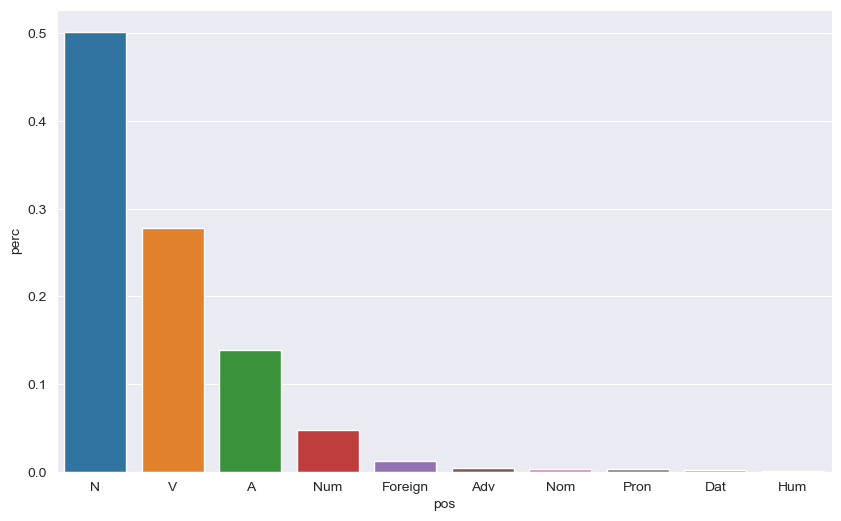

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pos_tag_by_lemma.query('perc > 0.001'), x='pos', y='perc')

მათ შორის როგორც ვხედავთ ყველაზე ხშირად არსებითი სახელები, ზმნები და ზედსართავი სახელების ტიპის სიტყვები გვხვდება კორპუსში.

In [70]:
cumulative_freq = pos_tag_by_freq.copy()
cumulative_freq.pos_tag = cumulative_freq.pos_tag.apply(lambda x: x + ' + _' if x != 'N' else x)
cumulative_freq.freq = cumulative_freq.freq.cumsum()

<Axes: xlabel='freq', ylabel='pos_tag'>

findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not

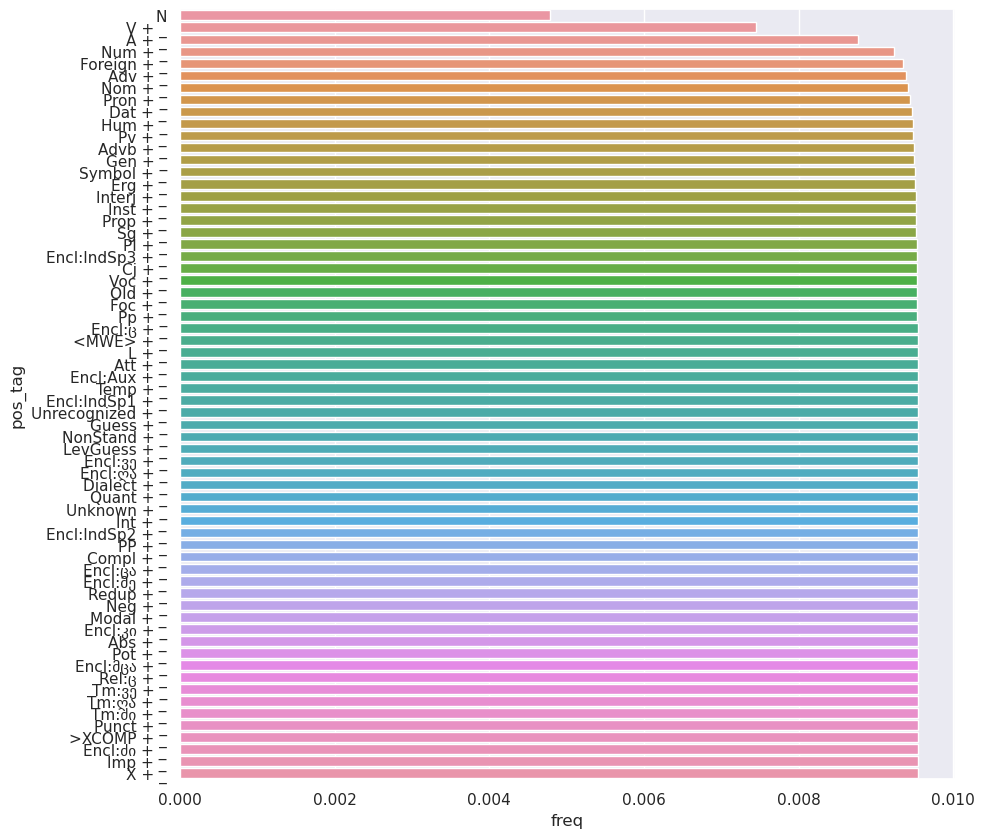

In [101]:
plt.figure(figsize=(10, 10))
sns.barplot(data=cumulative_freq.query('freq < 0.99'), y='pos_tag', x='freq', fill=True)

სიხშირეებს თუ დავაკვირდებით დავინახავთ, რომ 18 მეტყველების ნაწილის თეგი ასახავს ტექტში შეხვედრილი სიტყვების 99%

<Axes: xlabel='freq', ylabel='pos_tag'>

findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not

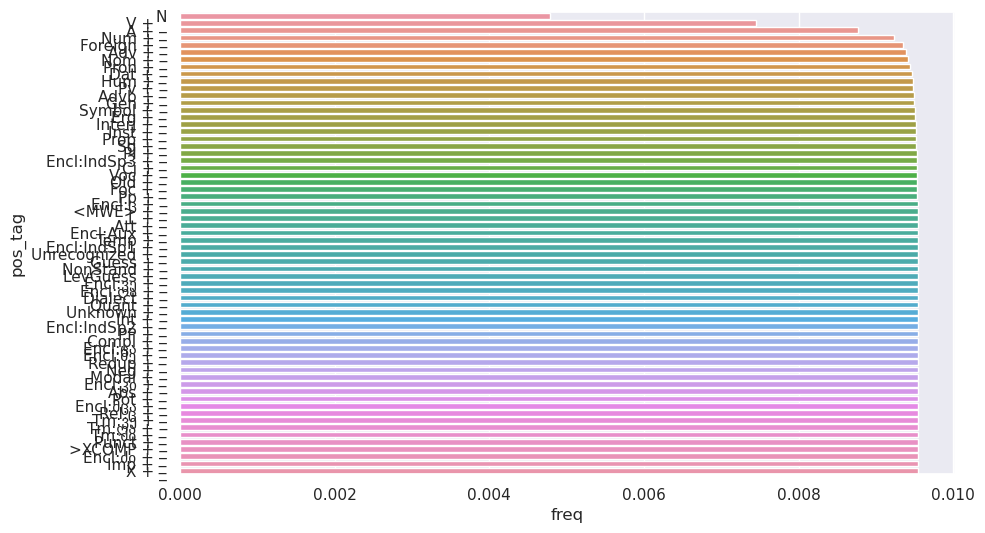

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cumulative_freq.query('freq < 0.90'), y='pos_tag', x='freq', fill=True)

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pos_tag_by_freq.query('freq > 0.01'), x='pos_tag', y='freq')

ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))
plt.ticklabel_format(style='plain', axis='x')
sns.barplot(data=pos_tag_by_lemma.query('perc < 0.00001'), y='pos', x='perc')

In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df2,order=pd.value_counts(df2.pos_tag).loc[lambda x: x < 50].index, x='pos_tag')

In [74]:
lexem_group_sizes = df2.groupby('lemma').word.count()
lexem_group_sizes = lexem_group_sizes.reset_index()

In [75]:
lexem_group_sizes.columns = ['lemma', 'count']
freq_group = lexem_group_sizes.sort_values(by='count', ascending=False)[:10]

<Axes: xlabel='lemma', ylabel='count'>

findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not

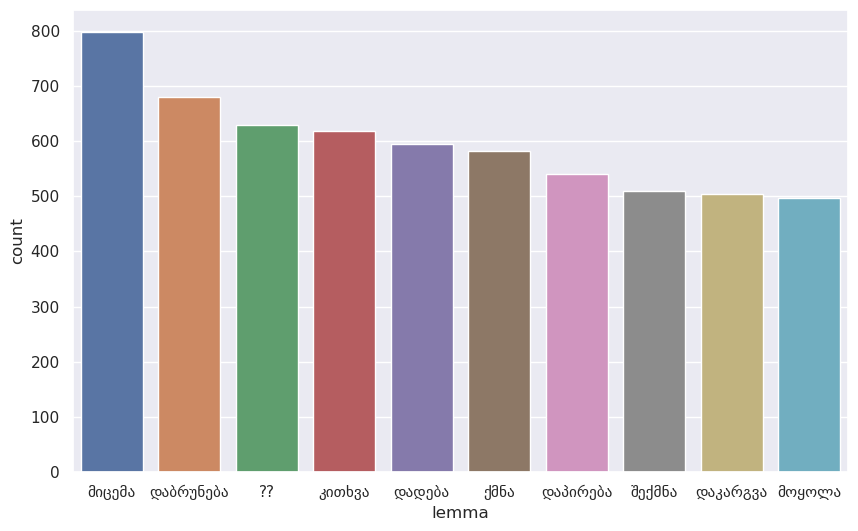

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(data=freq_group, x='lemma', y='count')

In [77]:
len(df2.lemma.unique())

211260

In [99]:
def get_lexem_freq_by_pos(tag: str, num=10):
    common_lexem_group_sizes = (df2[df2['pos_tag'] == tag]
    .groupby('lemma')
    .freq.sum()
    .reset_index())
    common_lexem_group_sizes.columns = ['lemma', 'count']
    return common_lexem_group_sizes.sort_values(by='count', ascending=False)[:num]

In [103]:
get_lexem_freq_by_pos('N')

,lemma,count
51129,საქართველო,1014946
68625,წელი,787061
60028,ქვეყანა,438910
49006,რუსეთი,403303
70984,ხელისუფლება,343562
3123,ადამიანი,319716
47074,პრეზიდენტი,319139
51155,საქმე,296345
21903,დრო,279542
26536,თბილისი,245522


<Axes: xlabel='lemma', ylabel='count'>

findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not

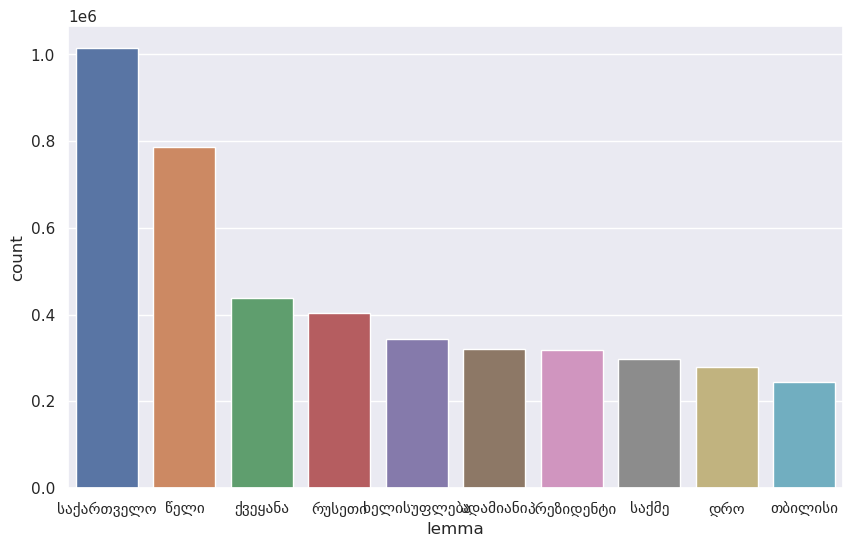

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(data=get_lexem_freq_by_pos('N'), x='lemma', y='count')

<Axes: xlabel='lemma', ylabel='count'>

findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not

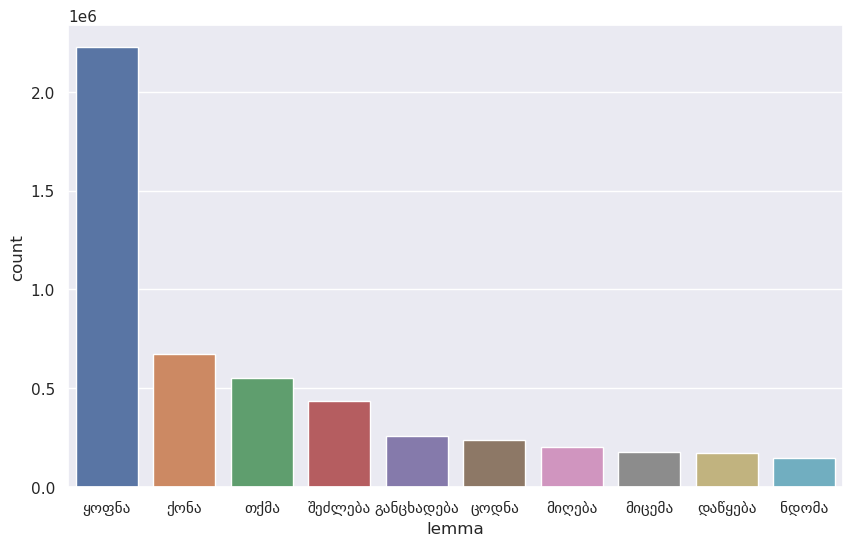

In [106]:
plt.figure(figsize=(10, 6))
sns.barplot(data=get_lexem_freq_by_pos('V'), x='lemma', y='count')

<Axes: xlabel='lemma', ylabel='count'>

findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not

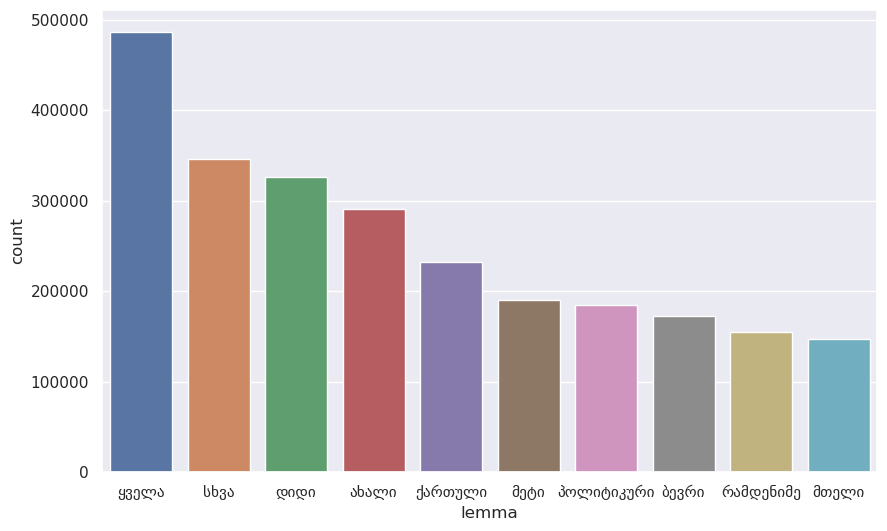

In [105]:
plt.figure(figsize=(10, 6))
sns.barplot(data=get_lexem_freq_by_pos('A'), x='lemma', y='count')

In [83]:
freq_lemma_df = df2.groupby('lemma').freq.sum().reset_index()
freq_lemma_df = freq_lemma_df.sort_values(by='freq', ascending=False)[:20]

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=freq_lemma_df, x='lemma', y='freq')

<Axes: xlabel='lemma', ylabel='freq'>

findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not found.
findfont: Font family 'Meiryo' not

In [85]:
freq_lemma_df = df2.groupby(['lemma', 'pos_tag']).freq.sum().reset_index()
freq_lemma_df = freq_lemma_df.sort_values(by='freq', ascending=False)

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=freq_lemma_df[freq_lemma_df['pos_tag'] == 'N'][:20], y='freq', x='lemma')

In [ ]:
plt.figure(figsize=(20, 6))
sns.barplot(data=freq_lemma_df[freq_lemma_df['pos_tag'] == 'V'][:20], y='freq', x='lemma')

<Axes: xlabel='lemma', ylabel='freq'>

/Users/nargizi/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4327 (\N{GEORGIAN LETTER QAR}) missing from current font.
  func(*args, **kwargs)
/Users/nargizi/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4309 (\N{GEORGIAN LETTER VIN}) missing from current font.
  func(*args, **kwargs)
/Users/nargizi/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4308 (\N{GEORGIAN LETTER EN}) missing from current font.
  func(*args, **kwargs)
/Users/nargizi/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4314 (\N{GEORGIAN LETTER LAS}) missing from current font.
  func(*args, **kwargs)
/Users/nargizi/opt/anaconda3/envs/NLP/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 4304 (\N{GEORGIAN LETTER AN}) missing from current font.
  func(*args, **kwargs)
/Users/nargizi/opt/anaconda

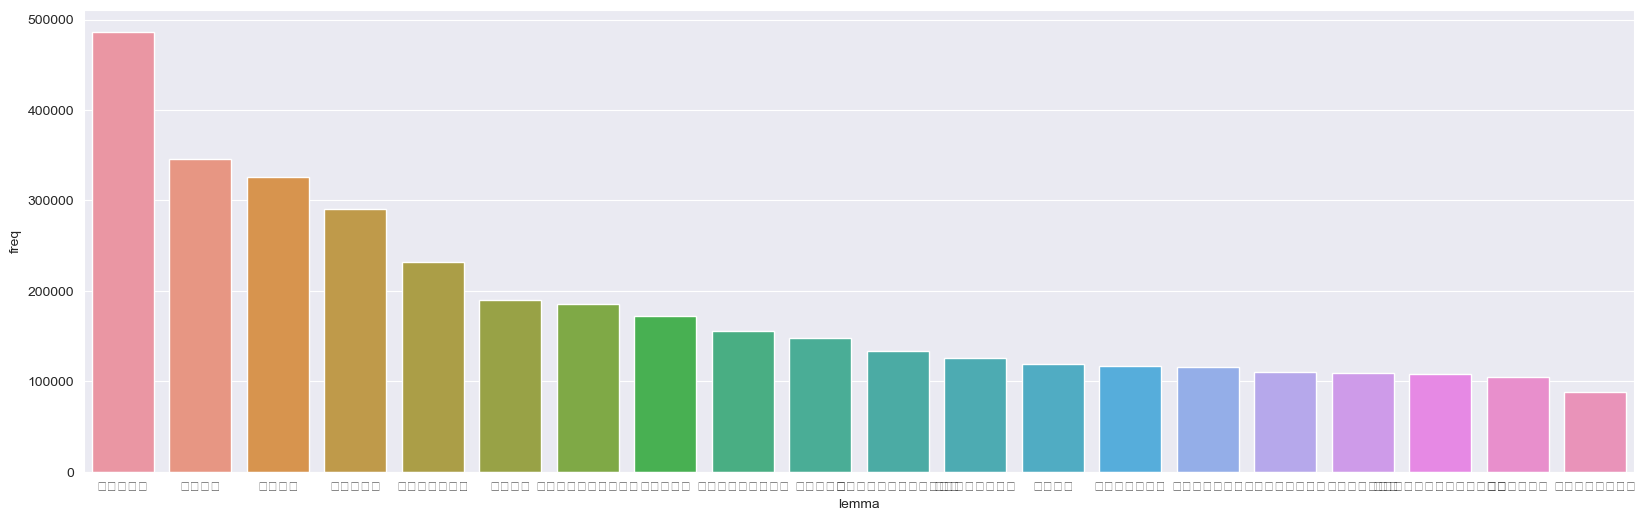

In [88]:
plt.figure(figsize=(20, 6))
sns.barplot(data=freq_lemma_df[freq_lemma_df['pos_tag'] == 'A'][:20], y='freq', x='lemma')

In [89]:
df[df['lemma'] == '??']

,word,lemma,freq,lemma_count


In [90]:
df2[df2['lemma'] == '??']

,word,lemma,pos_tag,freq
3255,დ,??,N,4110
8168,ჟიულ,??,N,240
8813,ერნსტ,??,N,251
24701,შესანარჩუნებლად,??,Unrecognized,2421
25886,გამოისობით,??,Unrecognized,458
...,...,...,...,...
2453258,ბესო-კესო,??,N,3
2454637,ბასკაკები,??,N,3
2465985,გეკონტაქტებათ,??,N,3
2468870,ურთიერთთანაცხოვრების,??,Unrecognized,2


In [91]:
cleaned_df[cleaned_df['word'] == 'დ']

,word,lemma,freq,lemma_count
3200,დ,{'დ-ი'},4110,1


In [92]:
comb = df.join(df2, lsuffix='_old', rsuffix='_new', on='word')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat